# Download Dataset melalui Kaggle

In [18]:
# from google.colab import files
# files.upload()

In [19]:
# !ls -lha kaggle.json

In [20]:
 # !pip install -q kaggle 

In [21]:
#  !mkdir -p ~/.kaggle

#  !cp kaggle.json ~/.kaggle/

In [22]:
# ! chmod 600 /root/.kaggle/kaggle.json

In [23]:
# !kaggle datasets download -d robertusbagaskara/indonesian-food-image --force
# !kaggle datasets download -d theresalusiana/indonesian-food

# Extract file Dataset yang sudah di-download

In [24]:
# import zipfile
# import os

# local_zip = "indonesian-food.zip"
# extract_folder = "dataset"

# with zipfile.ZipFile(local_zip, 'r') as zip_ref:
#     zip_ref.extractall(extract_folder)

# print(f"Isi ZIP file telah diekstrak ke: {extract_folder}")


In [25]:
#import os

#src = os.path.join("./dataset")
#dst = os.path.join("/content/drive/MyDrive/Dataset/")

#shutil.copytree(src,dst)

In [26]:
import os

dataset_dir = "dataset"
train_dir = os.path.join(dataset_dir,'train')
validation_dir = os.path.join(dataset_dir,'test')
test_dir = os.path.join(dataset_dir,'test')

In [27]:
print(os.listdir(train_dir))
print(os.listdir(validation_dir))
print(os.listdir(test_dir))

['sate', 'kebab', 'air', 'jeruk', 'ikan', 'kentang', 'burger', 'bubur', 'gado', 'cumi', 'gudeg', 'bakwan', 'bakso', 'rendang', 'kopi', 'cakwe', 'kacang', 'apel', 'donat', 'crepes', 'kerupuk', 'ayam', 'es krim', 'durian', 'batagor', 'anggur', 'fu yung hai', 'capcay']
['sate', 'kebab', 'air', 'jeruk', 'ikan', 'kentang', 'burger', 'bubur', 'gado', 'cumi', 'gudeg', 'bakwan', 'bakso', 'rendang', 'kopi', 'cakwe', 'kacang', 'apel', 'donat', 'crepes', 'kerupuk', 'ayam', 'es krim', 'durian', 'batagor', 'anggur', 'fu yung hai', 'capcay']
['sate', 'kebab', 'air', 'jeruk', 'ikan', 'kentang', 'burger', 'bubur', 'gado', 'cumi', 'gudeg', 'bakwan', 'bakso', 'rendang', 'kopi', 'cakwe', 'kacang', 'apel', 'donat', 'crepes', 'kerupuk', 'ayam', 'es krim', 'durian', 'batagor', 'anggur', 'fu yung hai', 'capcay']


In [28]:
 # !pip install -U -r "req.txt" --user --no-warn-script-location

path train: '/kaggle/input/indonesian-food/dataset/train'<br>
path test: '/kaggle/input/indonesian-food/dataset/test'<br>
path valid: '/kaggle/input/indonesian-food/dataset/valid'<br>
ada 4 kelas: bakso gado rendang sate

In [29]:
# Common imports
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from typing import Tuple, List

# Data Imports
import pandas as pd
from tqdm import tqdm
from glob import glob
from tensorflow import data as tfd
from tensorflow import image as tfi

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import clear_output as cls

# Model Architecture
from tensorflow.keras import Sequential
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
import tensorflow.keras.layers as tflayers

# Model Training
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.layers as tflayers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_tuner import HyperModel, RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras import regularizers
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# Model Hypertunning
# !pip install Keras-Preprocessing
# !pip install keras-tuner --upgrade

# cls()
import keras_tuner as kt
from keras_tuner import HyperModel, RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4300025529681460220
xla_global_id: -1
]


2024-02-02 05:22:11.811467: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-02 05:22:11.813194: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [30]:
IMAGE_SIZE = 224
BATCH_SIZE = 64
CLASS_NAMES = ['sate', 'kebab', 'air', 'jeruk', 'ikan', 'kentang', 'burger', 'bubur', 'gado', 'cumi', 'gudeg', 'bakwan', 'bakso', 'rendang', 'kopi', 'cakwe', 'kacang', 'apel', 'donat', 'crepes', 'kerupuk', 'ayam', 'es krim', 'durian', 'batagor', 'anggur', 'fu yung hai', 'capcay']
TRAINING_DIR = train_dir
VALIDATION_DIR = validation_dir
TEST_DIR = test_dir

In [31]:
with tf.device('/gpu:0'):
    model = Sequential()

    # base_model = Xception(
    #     input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
    #     include_top=False,
    #     weights='imagenet'
    # )
    # model.add(base_model)
    # model.add(tf.keras.layers.GlobalAveragePooling2D())

    # nontransfer learning
    model.add(tflayers.Rescaling(1./255, offset=-1))
    model.add(tflayers.Conv2D(16, (3,3), activation='relu'))
    model.add(tflayers.MaxPooling2D(2,2))

    model.add(tflayers.Conv2D(32, (3,3), activation='relu'))
    model.add(tflayers.MaxPooling2D(2,2))

    model.add(tflayers.Conv2D(64, (3,3), activation='relu'))
    model.add(tflayers.MaxPooling2D(2,2))

    model.add(tflayers.Conv2D(128, (3,3), activation='relu'))
    model.add(tflayers.MaxPooling2D(2,2))
    model.add(tflayers.Conv2D(256, (3,3), activation='relu'))

    model.add(tflayers.MaxPooling2D(2,2))
    model.add(tflayers.Conv2D(512, (3,3), activation='relu'))
    model.add(tflayers.MaxPooling2D(2,2))
    model.add(tflayers.Flatten())

    # Tune the hyperparameters for the Dense layer
    model.add(Dense(512, activation='relu'))
    model.add(tflayers.Dropout(0.1))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(28, activation='softmax'))

# Print the model summary
# model.summary()

In [32]:
initial_LR = 6e-4

optimizer = tf.keras.optimizers.Adam(learning_rate=initial_LR)

model.compile(
    optimizer=optimizer, 
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    metrics=['accuracy']
)

In [33]:
IMAGES_SIZE = (IMAGE_SIZE, IMAGE_SIZE)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
    tf.keras.layers.experimental.preprocessing.RandomContrast(factor=0.4)
])

train_generator = tf.keras.utils.image_dataset_from_directory(
    TRAINING_DIR,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    class_names=CLASS_NAMES,
    image_size=IMAGES_SIZE
    
)

validation_generator = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    class_names=CLASS_NAMES,
    image_size=IMAGES_SIZE
    
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    class_names=CLASS_NAMES,
    image_size=IMAGES_SIZE,
    shuffle=False
)

Found 7898 files belonging to 28 classes.
Found 1063 files belonging to 28 classes.
Found 1063 files belonging to 28 classes.


In [34]:
train_generator = train_generator.map(lambda x, y: (data_augmentation(x, training=True), y))

# Configure the dataset for performance
train_generator = train_generator.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_generator = validation_generator.prefetch(buffer_size=tf.data.AUTOTUNE)

In [35]:
# Perform hyperparameter tuning
# tuner.search(
#     train_generator, 
#     validation_data=validation_generator, 
#     epochs=10
# #     steps_per_epoch=100
# )

# Get the best hyperparameters and build the final model
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# model = tuner.hypermodel.build(best_hps)

In [37]:
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator, 
    callbacks=[early_stopping], 
    epochs=100,
    verbose=1, 
    validation_data = validation_generator,
#     steps_per_epoch = 1
)

# val_loss_per_epoch = history.history['val_accuracy']
# best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
# print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
124/124 [==============================] - 75s 599ms/step - loss: 1.7703 - accuracy: 0.3339 - val_loss: 1.8486 - val_accuracy: 0.3603
Epoch 2/100
124/124 [==============================] - 74s 594ms/step - loss: 1.5664 - accuracy: 0.4242 - val_loss: 1.6349 - val_accuracy: 0.4506
Epoch 3/100
124/124 [==============================] - 74s 590ms/step - loss: 1.4868 - accuracy: 0.4762 - val_loss: 1.5994 - val_accuracy: 0.4534
Epoch 4/100
124/124 [==============================] - 73s 587ms/step - loss: 1.3938 - accuracy: 0.5032 - val_loss: 1.5083 - val_accuracy: 0.4986
Epoch 5/100
124/124 [==============================] - 74s 591ms/step - loss: 1.3567 - accuracy: 0.5303 - val_loss: 1.5137 - val_accuracy: 0.4788
Epoch 6/100
124/124 [==============================] - 73s 589ms/step - loss: 1.2778 - accuracy: 0.5603 - val_loss: 1.4689 - val_accuracy: 0.4751
Epoch 7/100
124/124 [==============================] - 74s 590ms/step - loss: 1.2410 - accuracy: 0.5698 - val_loss: 1.3073 -

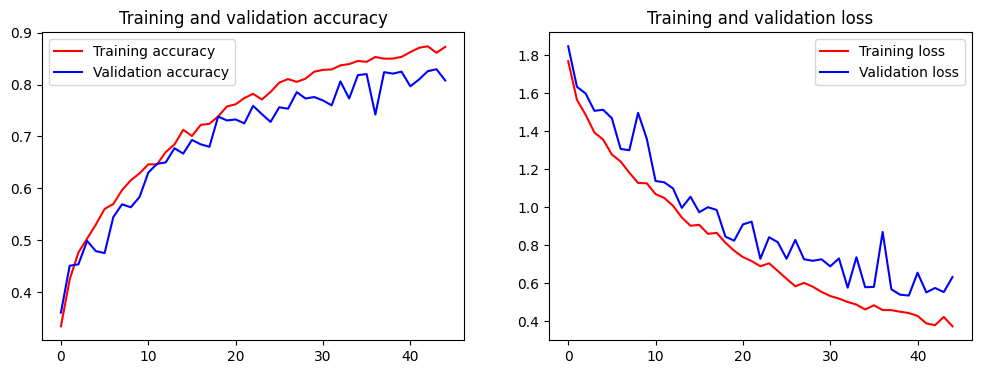

In [38]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

figure, axis = plt.subplots(1, 2, figsize=(12, 4))

axis[0].plot(epochs, acc, 'r', label='Training accuracy')
axis[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
axis[0].set_title("Training and validation accuracy")
axis[0].legend(loc=0)

axis[1].plot(epochs, loss, 'r', label='Training loss')
axis[1].plot(epochs, val_loss, 'b', label='Validation loss')
axis[1].set_title("Training and validation loss")
axis[1].legend(loc=0)


plt.show()

In [39]:
from datetime import datetime
# current date and time
now = datetime.now()

time_stamp = datetime.timestamp(now)
name = f'model-Bloss-{time_stamp}'
model.save(f'{name}.h5')

/home/jupyter/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
# checkpoints_cb = tf.keras.callbacks.ModelCheckpoint('./checkpoints', options=save_locally)

In [ ]:
# # hypermodel = tuner.hypermodel.build(best_hps)

# # Retrain the model
# historyFinal = model.fit(
#     train_generator, 
#     epochs=best_epoch, 
#     verbose=1,
#     validation_data = validation_generator,
#     callbacks=[checkpoints_cb],
# #     steps_per_epoch = 10
# )

In [ ]:
# eval_result = hypermodel.evaluate(img_test, label_test)
# print("[test loss, test accuracy]:", eval_result)

In [ ]:
# import matplotlib.pyplot as plt

# # Plot the results
# acc = historyFinal.history['accuracy']
# val_acc = historyFinal.history['val_accuracy']
# loss = historyFinal.history['loss']
# val_loss = historyFinal.history['val_loss']

# epochs = range(len(acc))

# figure, axis = plt.subplots(1, 2, figsize=(12, 4))

# axis[0].plot(epochs, acc, 'r', label='Training accuracy')
# axis[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
# axis[0].set_title("Training and validation accuracy")
# axis[0].legend(loc=0)

# axis[1].plot(epochs, loss, 'r', label='Training loss')
# axis[1].plot(epochs, val_loss, 'b', label='Validation loss')
# axis[1].set_title("Training and validation loss")
# axis[1].legend(loc=0)


# plt.show()

In [ ]:
# # Define the path to the directory where the checkpoints were saved
# checkpoint_dir = './checkpoints'

# # Load the best checkpoint using tf.keras.models.load_model()
# best_model = tf.keras.models.load_model(checkpoint_dir)

In [ ]:
# from datetime import datetime
# # current date and time
# now = datetime.now()

# time_stamp = datetime.timestamp(now)
# name = f'model-train-{time_stamp}'
# best_model.save(f'{name}.h5')

In [ ]:
# import tensorflow as tf
# best_model = tf.keras.models.load_model(
#     '/kaggle/input/models/model-train-1685722885.101213.h5'
# )
# model = tf.keras.models.load_model(
#     '/kaggle/input/models/model-Bloss-1685721375.749981.h5'
# )

In [40]:
test_loss_loss, test_acc_loss = model.evaluate(test_dataset, verbose=0)

# test_loss, test_acc = best_model.evaluate(test_dataset, verbose=0)
# print(
#     "model train\n",
#     "Loss    : {:.4}\n".format(test_loss), 
#     "Accuracy: {:.4}%\n".format(test_acc*100)
# )
print(
    "\nmodel Bloss\n",
    "Loss    : {:.4}\n".format(test_loss_loss), 
    "Accuracy: {:.4}%\n".format(test_acc_loss*100)
)


model Bloss
 Loss    : 0.5342
 Accuracy: 82.5%



In [41]:
def auto_testing(TEST_DIR, best_model):
    for dirname, _, filenames in os.walk(TEST_DIR):
        if dirname is not TEST_DIR:
            last_dir = os.path.basename(os.path.normpath(dirname))
            correct = 0
            report = None
            for idx, filename in enumerate(filenames):
                path = filename

                img = load_img(os.path.join(
                    os.path.join(TEST_DIR, dirname), filename), target_size=(IMAGE_SIZE, IMAGE_SIZE))
                x = img_to_array(img)
                x = np.expand_dims(x, axis=0)

                images = np.vstack([x])
                classes = best_model.predict(images, batch_size=128, verbose=0)
                score = tf.nn.softmax(classes[0])

                predicted_class = np.argmax(score)
                predicted_class_name = class_names[np.argmax(score)]

                if(last_dir==predicted_class_name): correct += 1
    #             print("Image: ", filename)
    #             print(
    #                 "This image most likely belongs to {} with a {:.2f} percent confidence.\n"
    #                 .format(predicted_class_name, 100 * np.max(score))
    #             )

            print(f'untuk folder {last_dir}')
            print("Jumlah data",len(os.listdir(os.path.join(TEST_DIR, dirname))))
            print("Jumlah data benar", correct)
            print(
                "Akurasi {:.2f}\n"
                .format(100*(correct/len(os.listdir(os.path.join(TEST_DIR, dirname)))))
            )

In [51]:
import numpy as np
import os
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

true_labels = np.concatenate([y for _, y in test_dataset], axis=0)

true_labels = to_categorical(true_labels, num_classes=4)

class_names = CLASS_NAMES
print(class_names)
 
# predicting images
TEST_DIR = '/dataset/test'
# auto_testing(TEST_DIR, best_model)
print('===============================')
auto_testing(TEST_DIR, model)



['sate', 'kebab', 'air', 'jeruk', 'ikan', 'kentang', 'burger', 'bubur', 'gado', 'cumi', 'gudeg', 'bakwan', 'bakso', 'rendang', 'kopi', 'cakwe', 'kacang', 'apel', 'donat', 'crepes', 'kerupuk', 'ayam', 'es krim', 'durian', 'batagor', 'anggur', 'fu yung hai', 'capcay']


In [52]:
# Function to load and preprocess images
def load_images(directory):
    images = []
    labels = []
    for class_name in CLASS_NAMES:
        class_dir = os.path.join(directory, class_name)
        for filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, filename)
            img = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
            img = img_to_array(img) / 255.0
            images.append(img)
            labels.append(CLASS_NAMES.index(class_name))
    return np.array(images), np.array(labels)

In [53]:
TEST_DIR = 'dataset/test' 
# Make predictions
test_dataset, test_label = load_images(TEST_DIR)

baseline_pred = np.argmax(model.predict(test_dataset, verbose=0), axis=-1)
# best_pred = np.argmax(mobile_net_model.predict(X_test, verbose=0), axis=-1)

# Evaluate prediction : Precision
baseline_pre = precision_score(test_label, baseline_pred, average='macro', zero_division=0)
# best_pre = precision_score(y_test, best_pred, average='macro')

# Evaluate prediction : Recall
baseline_recall = recall_score(test_label, baseline_pred, average='macro', zero_division=0)
# best_recall = recall_score(y_test, best_pred, average='macro')

# Evaluate prediction : F1 Score
baseline_f1 = f1_score(test_label, baseline_pred, average='macro', zero_division=0)
# best_f1 = f1_score(y_test, best_pred, average='macro')

print("{:20}".format("Baseline Performance"))
print("{:10} : {:.5}".format("Precision", baseline_pre))
print("{:10} : {:.5}".format("Recall", baseline_recall))
print("{:10} : {:.5}".format("F1 Score", baseline_f1))

print('\n',classification_report(test_label, baseline_pred, zero_division=0))

Baseline Performance
Precision  : 0.00026878
Recall     : 0.035714
F1 Score   : 0.00053355

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       214
           1       0.00      0.00      0.00         5
           2       0.01      1.00      0.01         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00       216
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00        52
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00       219
          13       0.00      0.00      0.00       222
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.0